In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
file_path = 'GS.csv'


In [2]:
stocks = pd.read_csv(file_path, header=0, index_col='Date', parse_dates=True)

In [3]:
# summary statistics
st2 = stocks.describe()
print(st2)

# information about the data
stocks.info()

              Open         High          Low        Close    Adj Close  \
count  5762.000000  5762.000000  5762.000000  5762.000000  5762.000000   
mean    160.717986   162.655643   158.761075   160.732162   140.676221   
std      71.225751    71.755243    70.613907    71.177093    73.187668   
min      54.000000    54.540001    47.410000    52.000000    42.490295   
25%     100.552502   102.277499    99.162501   100.705002    81.146532   
50%     157.605004   159.699997   156.004998   157.750000   134.576713   
75%     199.507496   201.847496   197.419995   199.502499   177.186802   
max     423.119995   426.160004   413.760010   423.850006   419.154236   

             Volume  
count  5.762000e+03  
mean   5.264446e+06  
std    6.077306e+06  
min    1.076000e+05  
25%    2.487625e+06  
50%    3.553000e+06  
75%    5.578525e+06  
max    1.145907e+08  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5762 entries, 1999-05-04 to 2022-03-24
Data columns (total 6 columns):
 #   Column

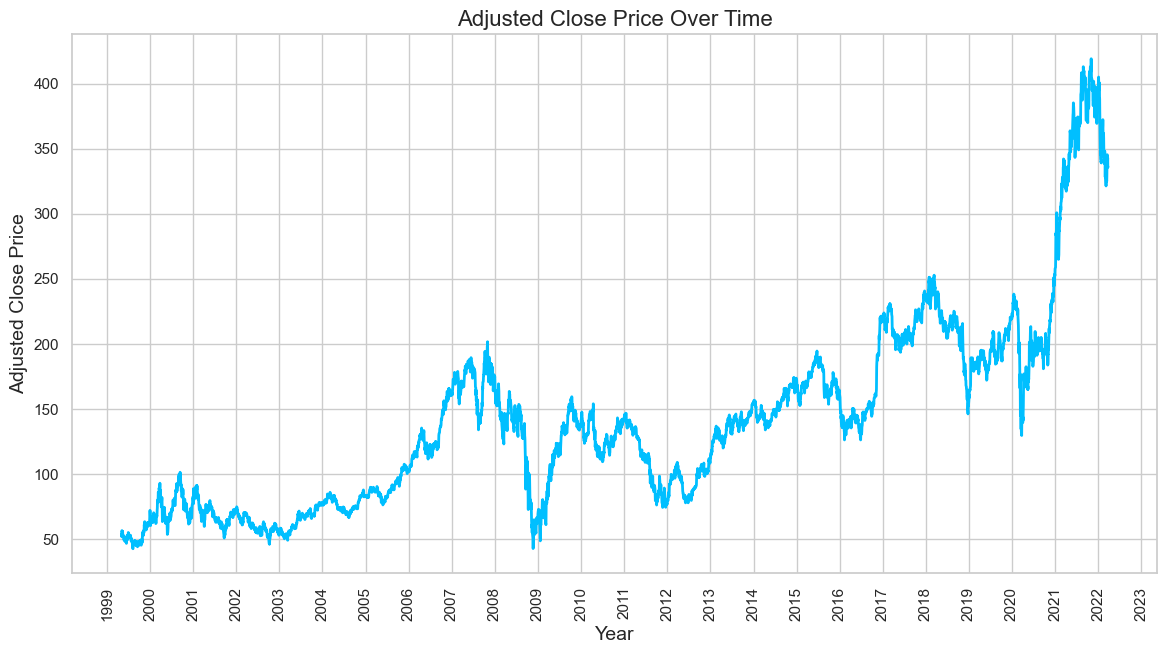

In [4]:
# set style
sns.set(style='whitegrid')

# Adjusted Close Price over time/ line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=stocks, x=stocks.index, y='Adj Close', color='deepskyblue', linewidth=2)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.show()

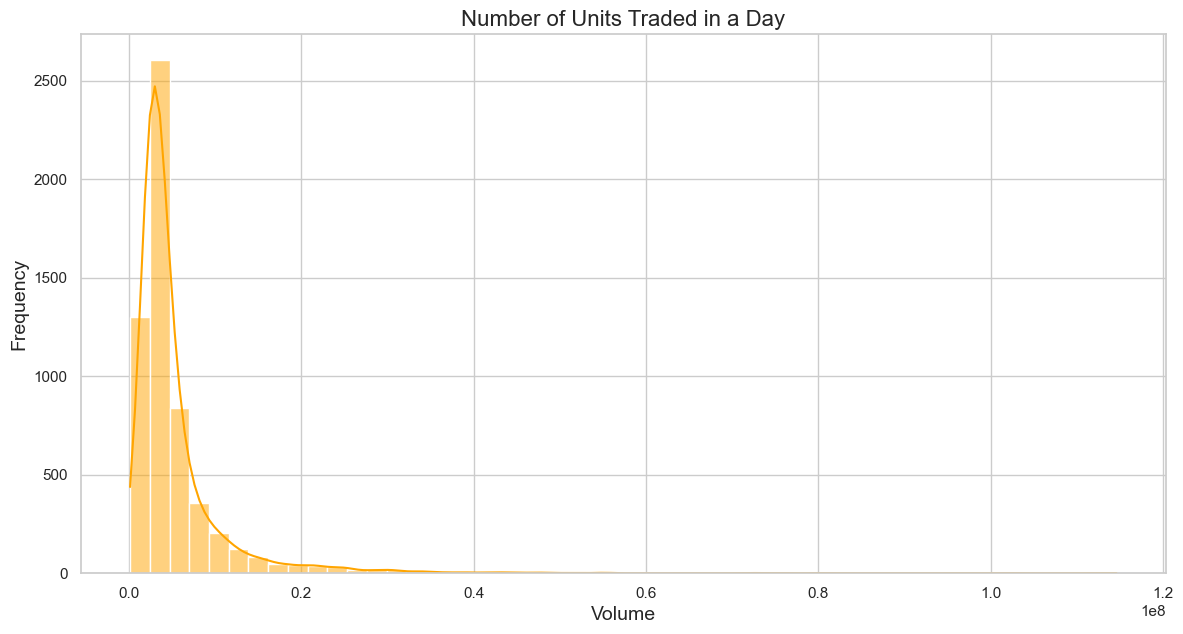

In [8]:
# number of units traded in a day/ histogram
plt.figure(figsize=(14, 7))
sns.histplot(stocks['Volume'], bins=50, color='orange', kde=True)
plt.title('Number of Units Traded in a Day', fontsize=16)
plt.xlabel('Volume', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


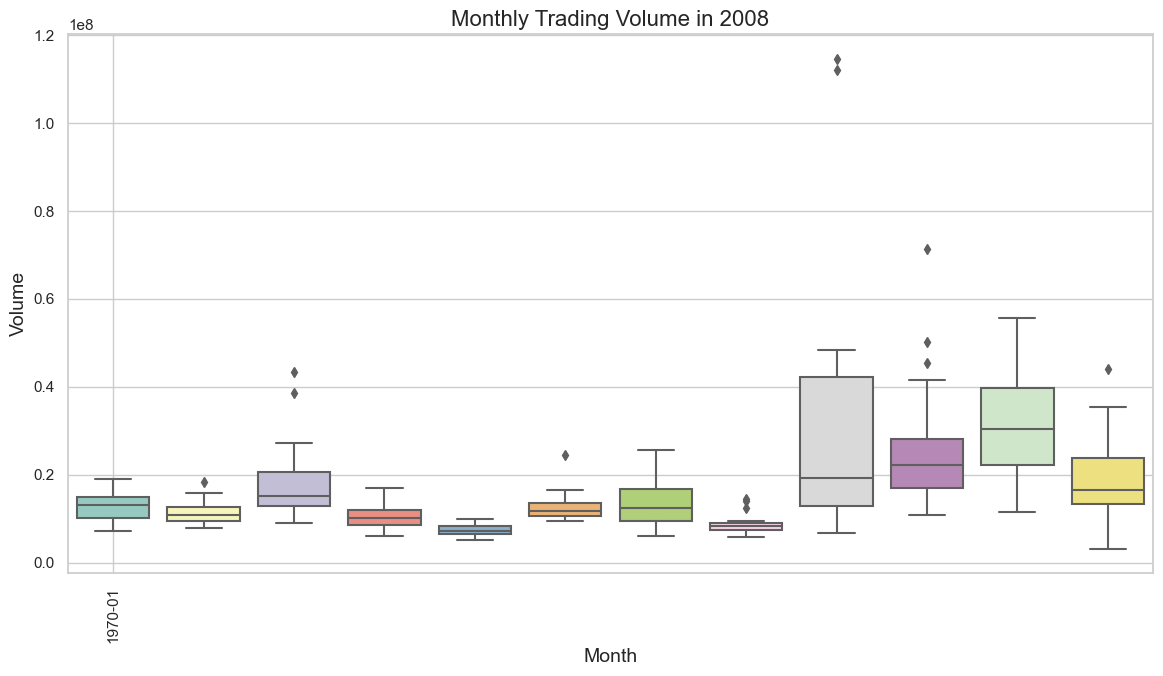

In [9]:
# monthly trading volume in 2008/ box plot
plt.figure(figsize=(14, 7))
df = stocks.loc['2008']
sns.boxplot(x=df.index.month, y=df['Volume'], palette='Set3')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.title('Monthly Trading Volume in 2008', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

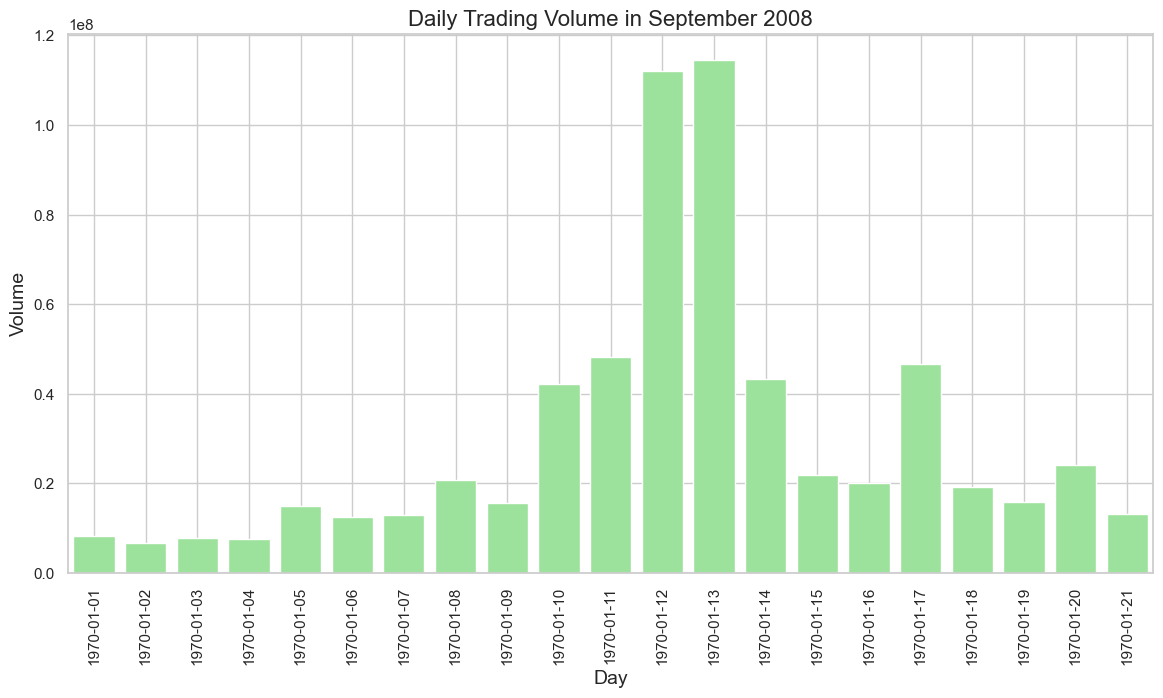

In [10]:
# daily trading volume in September 2008/ bar chart
plt.figure(figsize=(14, 7))
df = stocks.loc['2008-09']
sns.barplot(x=df.index, y=df['Volume'], color='lightgreen')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.xticks(rotation=90)
plt.title('Daily Trading Volume in September 2008', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Volume', fontsize=14)
plt.show()

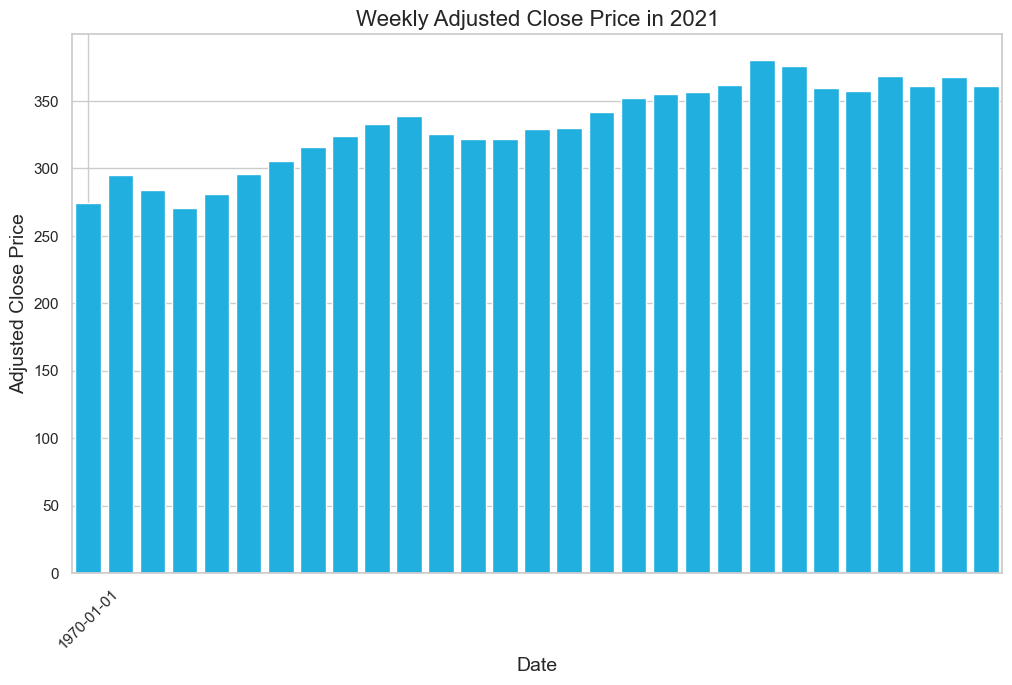

In [11]:
# weekly adjusted Close price for 2021/ bar chart
stock21 = stocks.loc['2021-01-01':'2021-07-22']
weekly_stock = stock21.resample('W').mean()

plt.figure(figsize=(12, 7))
sns.barplot(x=weekly_stock.index, y=weekly_stock['Adj Close'], color='deepskyblue')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)
plt.title('Weekly Adjusted Close Price in 2021', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price', fontsize=14)
plt.show()


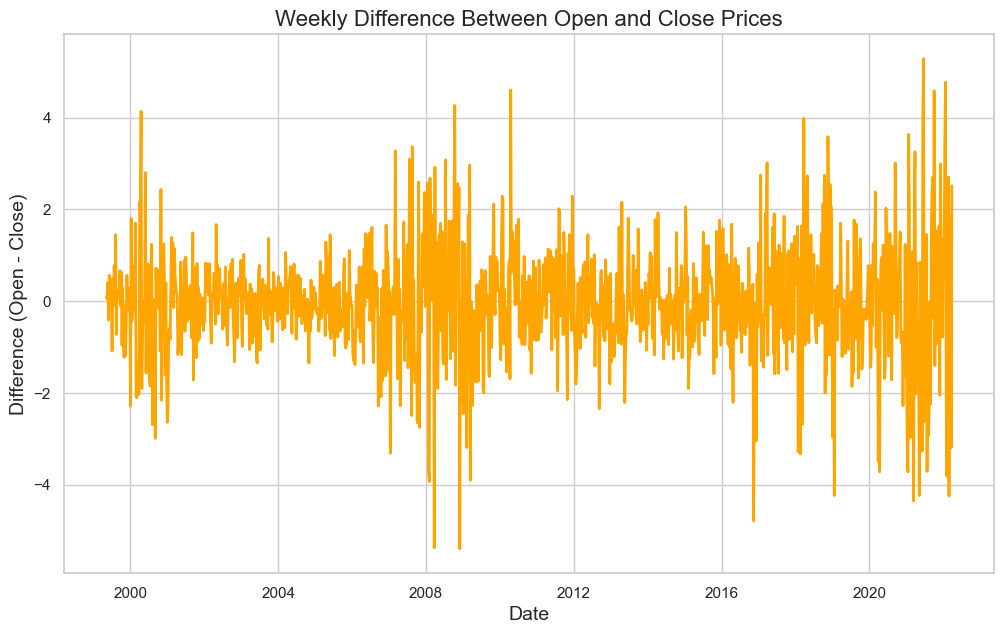

In [12]:
# the difference between Open and Close prices/ line plot
stocks['diff'] = stocks['Open'] - stocks['Close']
stocks_diff = stocks.resample('W').mean()

plt.figure(figsize=(12, 7))
sns.lineplot(data=stocks_diff, x=stocks_diff.index, y='diff', color='orange', linewidth=2)
plt.grid(True)
plt.title('Weekly Difference Between Open and Close Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Difference (Open - Close)', fontsize=14)
plt.show()

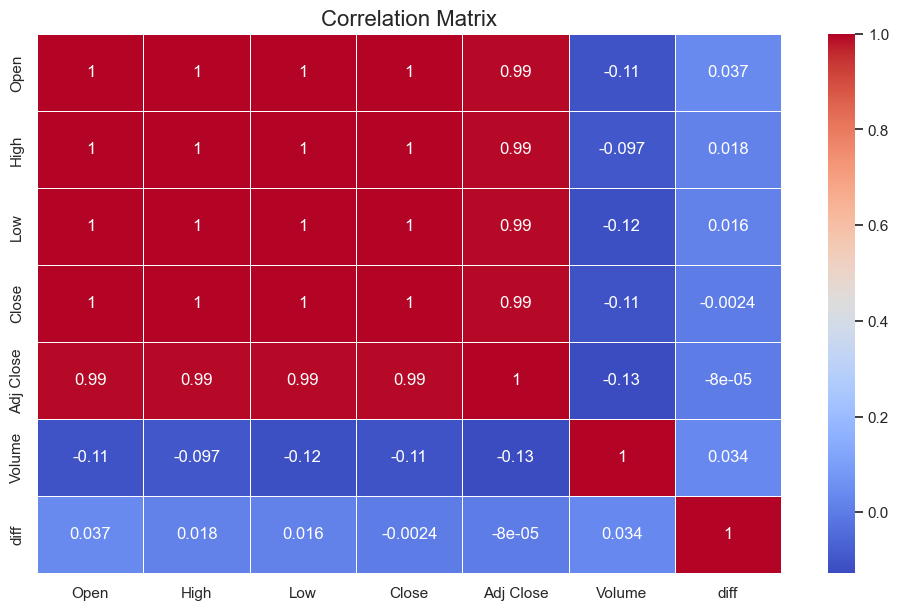

In [13]:
# correlation matrix
plt.figure(figsize=(12, 7))
sns.heatmap(stocks.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()